In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv(r"C:\Users\Aastha\Downloads\train (1).csv")

In [4]:
df_train.shape
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df_train.isnull().sum() / df_train.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

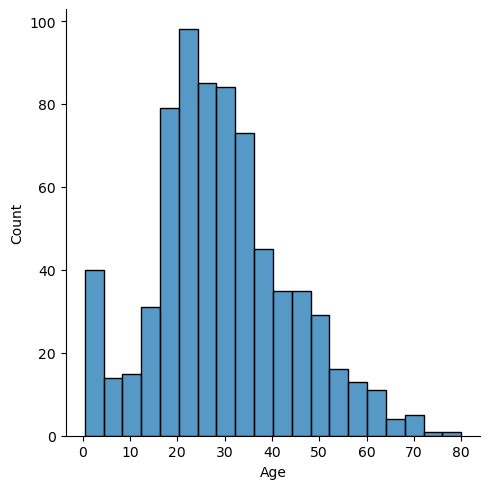

In [13]:
#how to deal with null values

#how to fill null values
#mean / median / mode

#we will be checking data distribution
#if dara is skewed we will be using median 

sns.displot( x = df_train["Age"])

In [14]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

In [16]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df_train['Sex'].value_counts() / df_train.shape[0] * 100

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64

In [18]:
df_train['Sex'].value_counts(normalize = True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [19]:
df_train['Survived'].value_counts(normalize= True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [20]:
df_train[df_train['Age']<18]['Sex'].value_counts()

Sex
male      58
female    55
Name: count, dtype: int64

In [21]:
df_train[(df_train['Survived'] == 1) & (df_train["Sex"]=="male") ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,29.699118,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,29.699118,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.000000,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,29.699118,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.000000,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.000000,1,1,347742,11.1333,NaN,S


In [22]:
df_train["is_adult"] = None

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_adult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,None


In [24]:
df_train["is_adult"] = np.where(df_train['Age'] > 18,1,0)

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_adult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [26]:
df_train['fare_bucket'] = np.where(df_train["Fare"] < 5, 0, np.where((df_train["Fare"]>6) & (df_train["Fare"] < 12),1,2))

In [27]:
df_train['sample_field'] = None

In [28]:
df_train.drop(['sample_field'], axis = 1, inplace = True)

In [29]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_adult,fare_bucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [30]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [32]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [33]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [34]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
is_adult         0
fare_bucket      0
dtype: int64

In [35]:
df_train.groupby(by = ['Survived','Sex','Pclass'])[['Fare']].mean()

Fare
Survived Sex    Pclass            
0        female 1       110.604167
                2        18.250000
                3        19.773093
         male   1        62.894910
                2        19.488965
                3        12.204469
1        female 1       105.978159
                2        22.288989
                3        12.464526
         male   1        74.637320
                2        21.095100
                3        15.579696

In [36]:
df_train.groupby(by = ['Survived','Sex','Pclass'])[['Survived']].count()

Survived
Survived Sex    Pclass          
0        female 1              3
                2              6
                3             72
         male   1             77
                2             91
                3            300
1        female 1             91
                2             70
                3             72
         male   1             45
                2             17
                3             47

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_adult,fare_bucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [38]:
df_train.drop(['PassengerId','Name','Cabin'],axis = 1, inplace = True)

In [39]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_adult,fare_bucket
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,1,1,female,35.0,1,0,113803,53.1000,S,1,2
4,0,3,male,35.0,0,0,373450,8.0500,S,1,1


<Axes: xlabel='Sex', ylabel='count'>

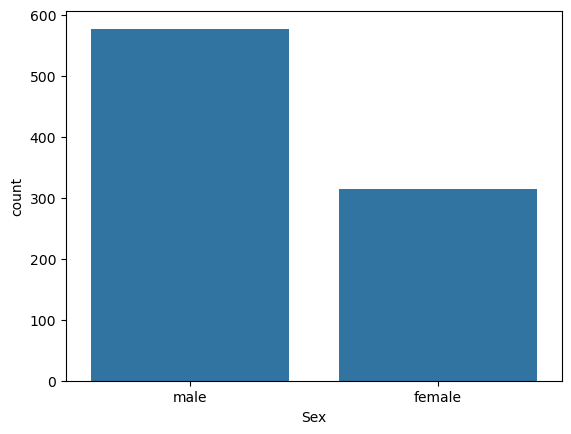

In [40]:
sns.countplot( x = df_train['Sex'])

(<Axes: xlabel='Survived', ylabel='count'>,)

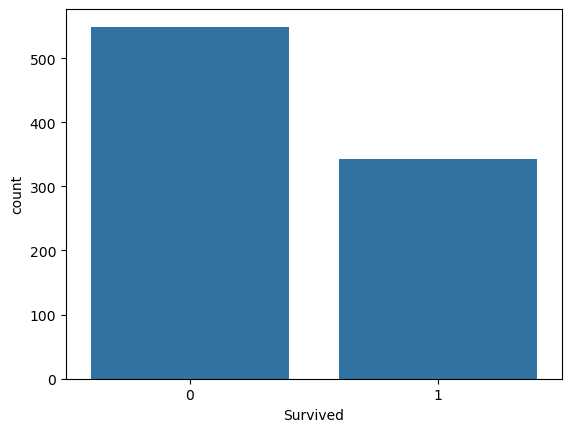

In [41]:
sns.countplot ( x = df_train['Survived']),

Text(0.5, 1.0, 'Age VS Fare')

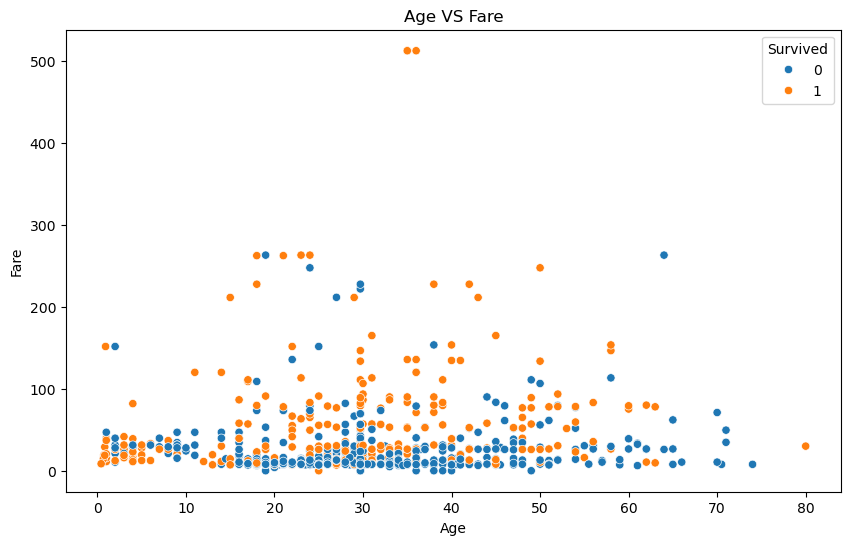

In [42]:
plt.figure(figsize = (10,6))  #control the size 
sns.scatterplot( x = df_train['Age'], y = df_train['Fare'], hue = df_train['Survived'])
plt.title("Age VS Fare")

<Axes: xlabel='Age', ylabel='Count'>

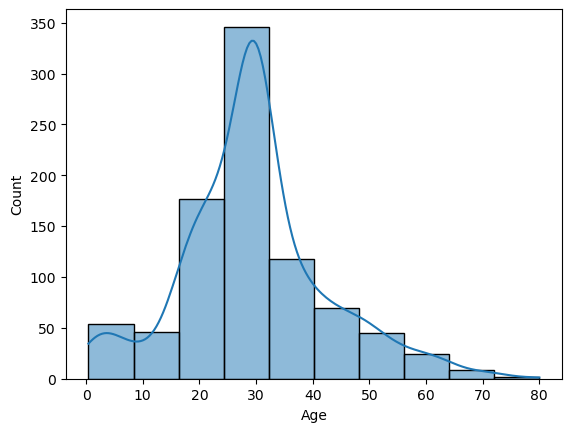

In [43]:
sns.histplot ( x = df_train['Age'], kde = True, bins=10 )

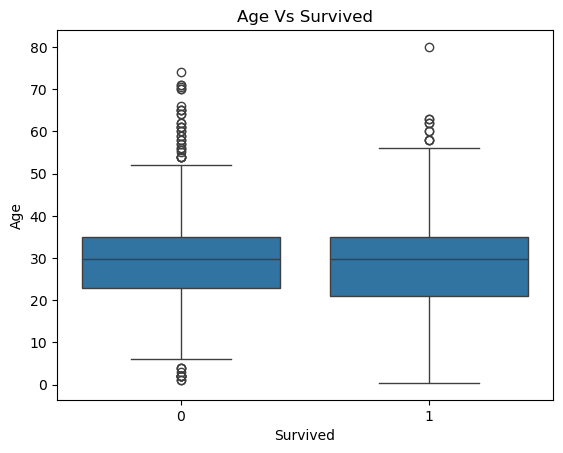

In [44]:
sns.boxplot ( x = df_train["Survived"],  y = df_train["Age"])
plt.title ("Age Vs Survived");

<Axes: xlabel='Survived', ylabel='Age'>

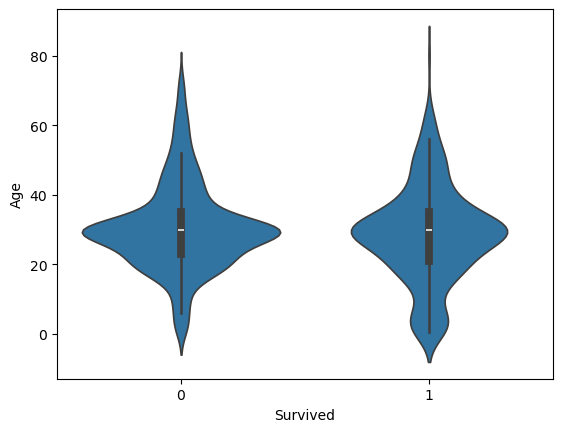

In [45]:
sns.violinplot( x = df_train["Survived"],  y = df_train["Age"])

<Axes: >

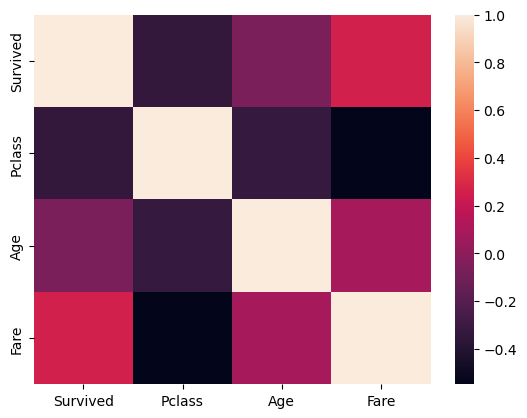

In [46]:
sns.heatmap(df_train[['Survived','Pclass','Age','Fare']].corr())

<Axes: >

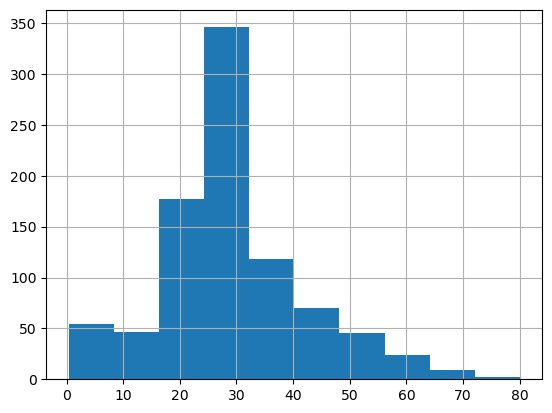

In [48]:
df_train['Age'].hist()

<Axes: >

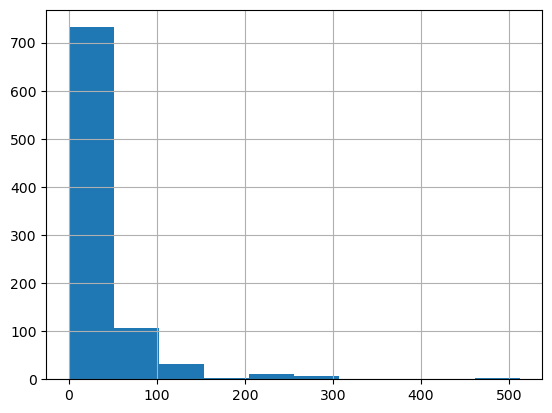

In [49]:
df_train['Fare'].hist()

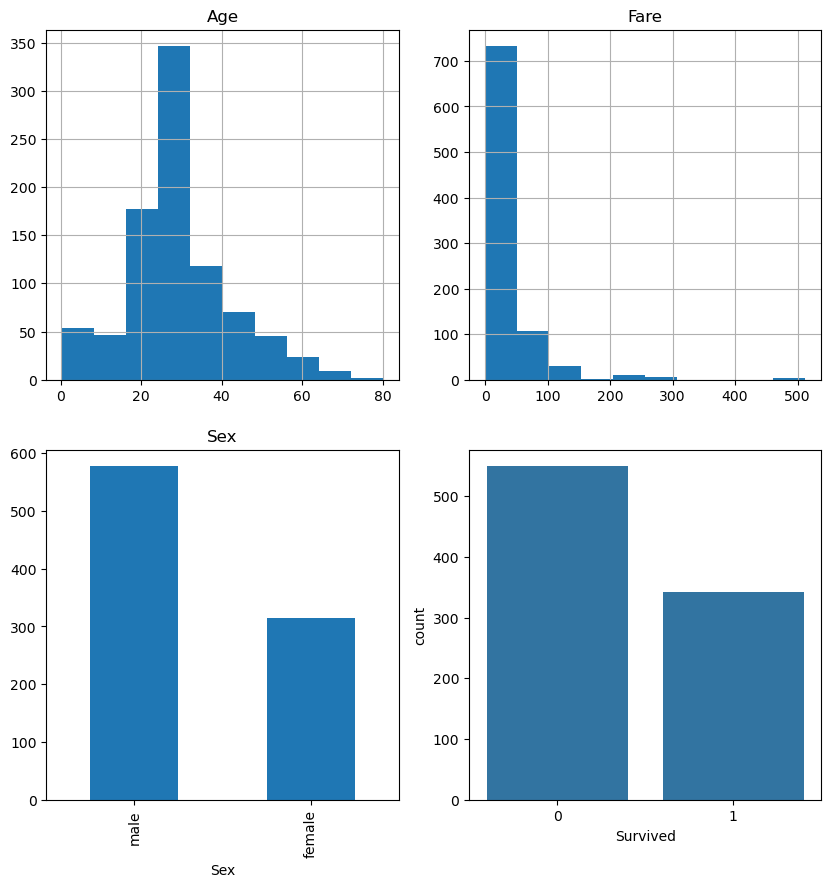

In [50]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
df_train['Age'].hist()
plt.title('Age')

plt.subplot(2,2,2)
df_train['Fare'].hist()
plt.title('Fare')

plt.subplot(2,2,3)
df_train['Sex'].value_counts().plot.bar()
plt.title('Sex')

plt.subplot(2,2,4)
sns.countplot ( x = df_train['Survived'])

plt.show()

In [51]:
cat_field = []
for column in df_train.columns:
    if (df_train[column].nunique() > 1 ) & ( df_train[column].nunique() < 10):
        cat_field.append(column)

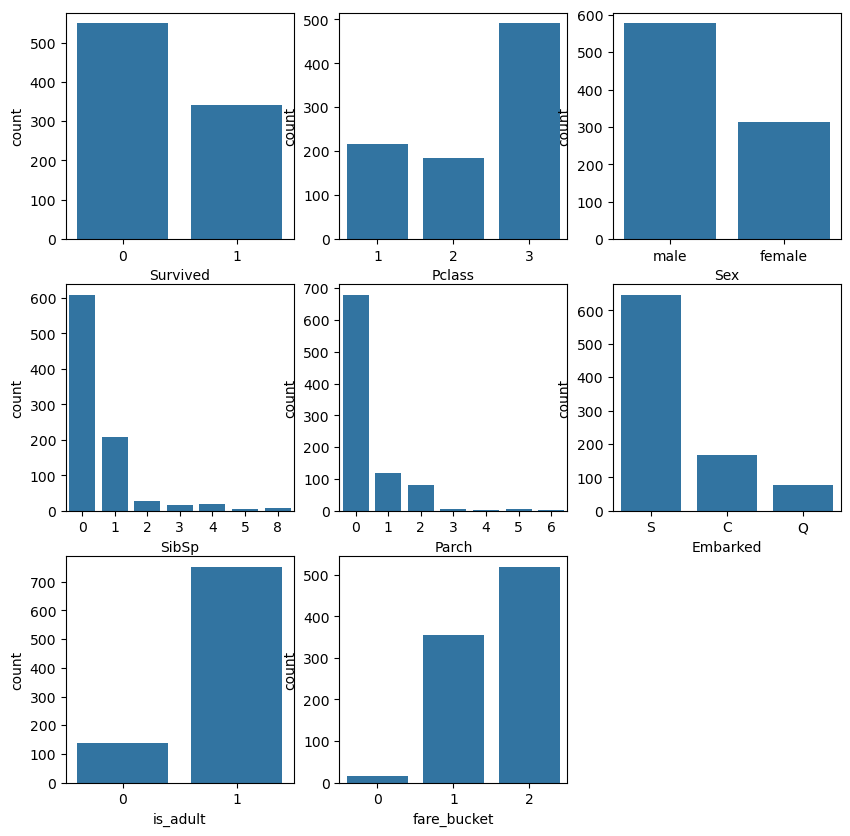

In [52]:
plt.figure(figsize = (10,10))

for index, col in enumerate(cat_field):
    plt.subplot(3,3,index+1)
    sns.countplot( x = df_train[col])
plt.show()

In [53]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_adult,fare_bucket
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,1,1,female,35.0,1,0,113803,53.1000,S,1,2
4,0,3,male,35.0,0,0,373450,8.0500,S,1,1


In [54]:
df_train.select_dtypes(exclude = np.number)

,Sex,Ticket,Embarked
0,male,A/5 21171,S
1,female,PC 17599,C
2,female,STON/O2. 3101282,S
3,female,113803,S
4,male,373450,S
...,...,...,...
886,male,211536,S
887,female,112053,S
888,female,W./C. 6607,S
889,male,111369,C


In [55]:
df_train.select_dtypes(include = np.number).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is_adult',
       'fare_bucket'],
      dtype='object')

In [56]:
df_train[~df_train.duplicated(subset = ['Pclass'], keep = "first")]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_adult,fare_bucket
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,2
9,1,2,female,14.0,1,0,237736,30.0708,C,0,2


In [57]:
df_train[~df_train.duplicated(subset = ['Ticket'])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_adult,fare_bucket
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,1,1,female,35.0,1,0,113803,53.1000,S,1,2
4,0,3,male,35.0,0,0,373450,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,SOTON/OQ 392076,7.0500,S,1,1
886,0,2,male,27.0,0,0,211536,13.0000,S,1,2
887,1,1,female,19.0,0,0,112053,30.0000,S,1,2
889,1,1,male,26.0,0,0,111369,30.0000,C,1,2


In [63]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_adult,fare_bucket
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S,1,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,C,1,2
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,1,1,0,35.0,1,0,113803,53.1000,S,1,2
4,0,3,1,35.0,0,0,373450,8.0500,S,1,1


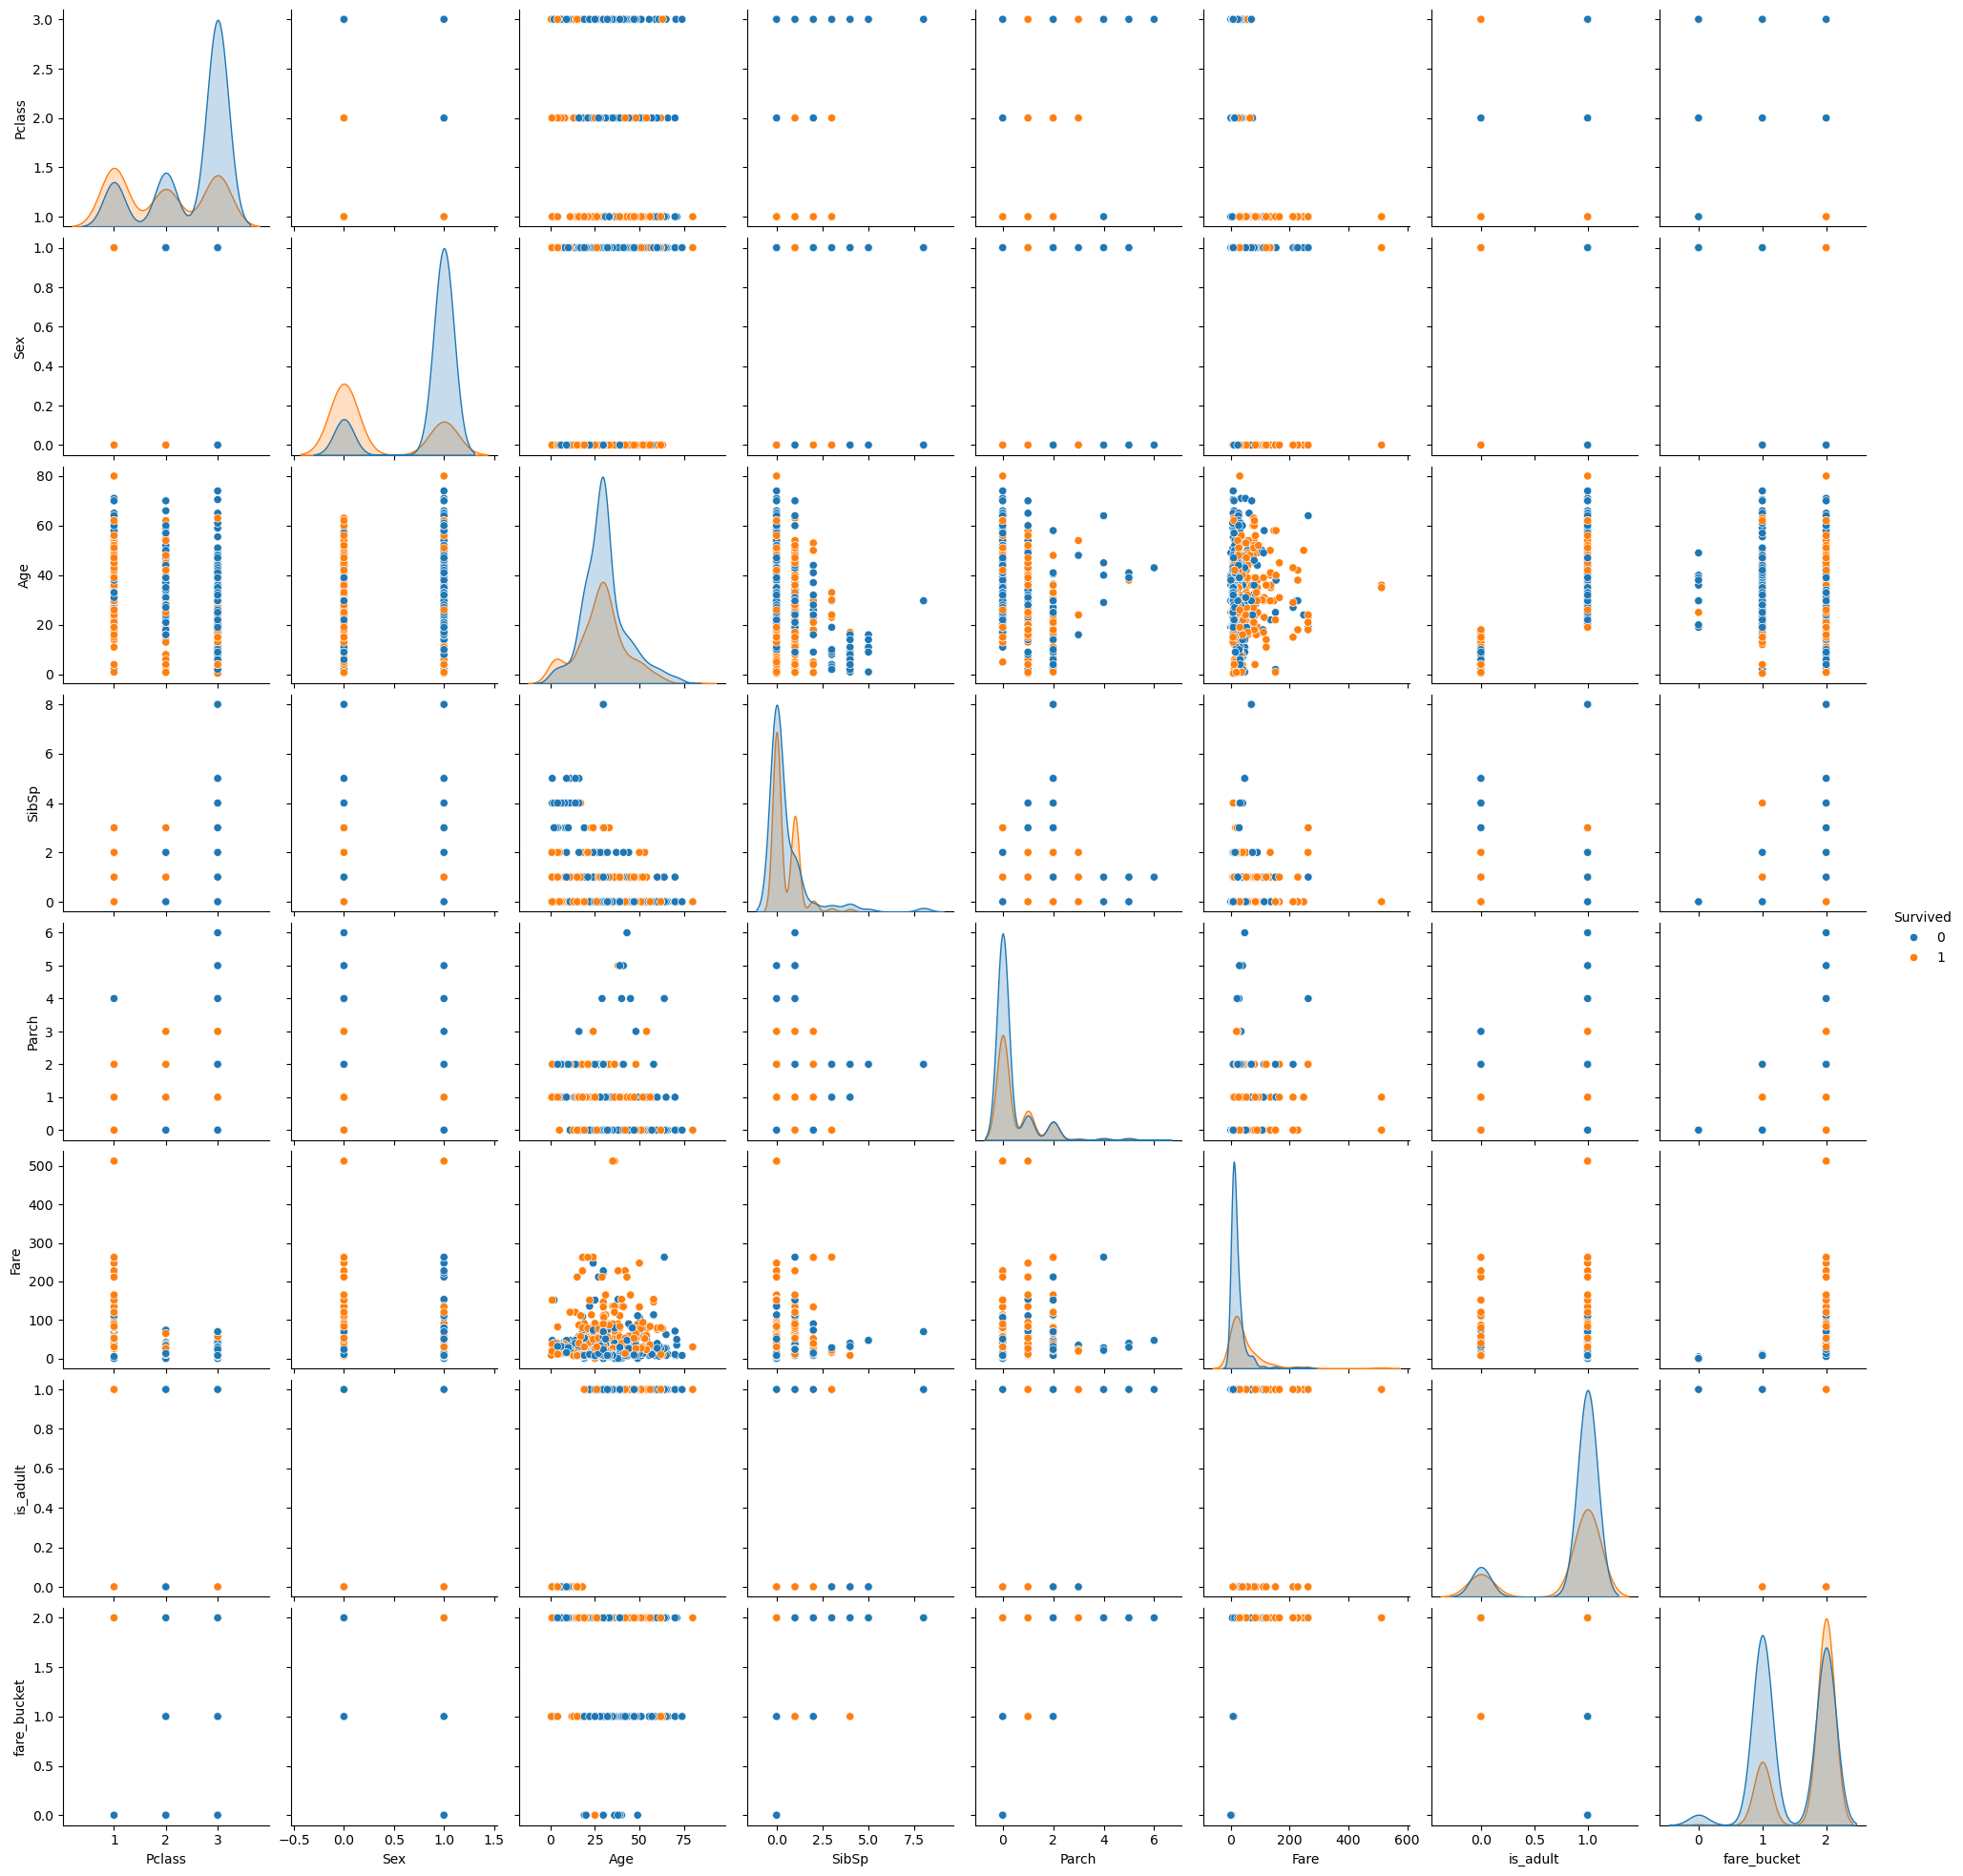

In [62]:
sns.pairplot(df_train,hue = "Survived") 